<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df1 = df.drop_duplicates(subset = ['Respondent'])
df1.shape

(11398, 85)

In [5]:
df1['WorkLoc'].replace(np.nan, 'Office', inplace = True)

In [6]:
df1['WorkLoc'].isnull().sum()

0

In [7]:
# your code goes here
replace={'Yearly': 1, 'Monthly': 12, 'Weekly': 52} 

# make a helper column for producting 'CompTotal'======>
adjust_product = df['CompFreq'].map(replace)

# creating new column as 'NormalizedAnnualCompensation':====>
df1['NormalizedAnnualCompensation'] = adjust_product* df['CompTotal']

In [8]:
df1.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


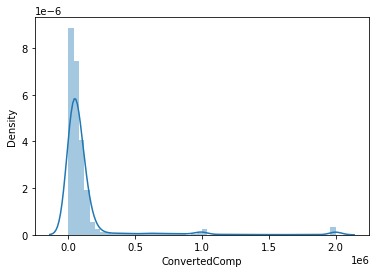

In [8]:
# your code goes here
ax = sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


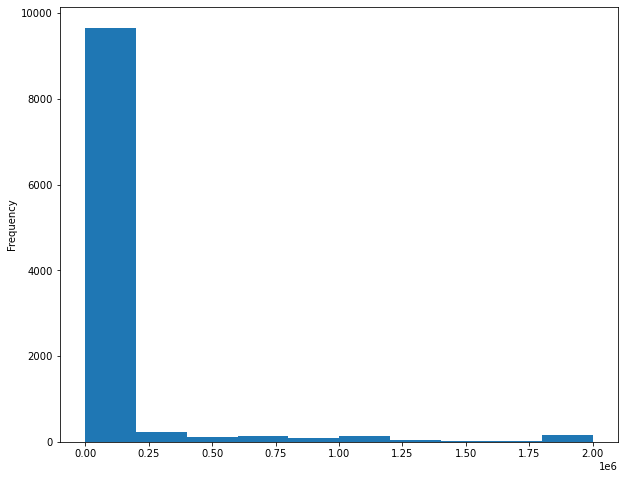

In [9]:
# your code goes here
#ax = plt.hist(df1['ConvertedComp'])
ax = df1['ConvertedComp'].plot(kind = 'hist', figsize =(10, 8))

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df1['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [11]:
# your code goes here
df1['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
df_group_gender = df1[['Gender', 'ConvertedComp']]
df_group_gender.head()

,Gender,ConvertedComp
0,Man,61000.0
1,Man,95179.0
2,Man,90000.0
3,Man,455352.0
4,Man,65277.0


In [13]:
df_group = df_group_gender.groupby(['Gender'], as_index=False).median()
df_group

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


In [14]:
woman_df=df1[df1['Gender']=='Woman']
woman_df["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
df1['Age'].describe()
df1['Age'].mean()

30.778894788947888

Plot a histogram of the column `Age`.


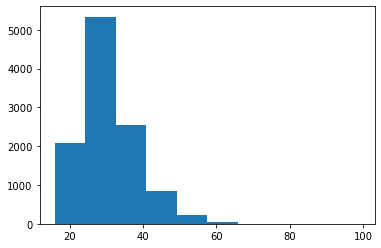

In [11]:
# your code goes here
ax = plt.hist(df1['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


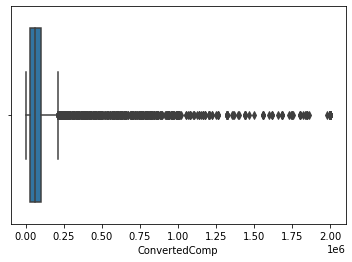

In [166]:
# your code goes here
#ax1 = df1['ConvertedComp'].plot(kind = 'box', figsize =(8, 8))
ax1 = sns.boxplot(x = "ConvertedComp", data = df1)

In [167]:
df1['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [168]:
# your code goes here
Q1 = df1['ConvertedComp'].quantile(0.25)
Q3 = df1['ConvertedComp'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)

26868.0 100000.0
73132.0


Find out the upper and lower bounds.


In [169]:
# your code goes here
L = Q1-1.5*IQR
U = Q3+1.5*IQR
print(L, U)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [170]:
# your code goes here
df1[(df1['ConvertedComp']< L)|(df1['ConvertedComp']>U)].ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [174]:
# your code goes here
df2 = df1[(df1['ConvertedComp'] > L) & (df1['ConvertedComp'] < U)] 

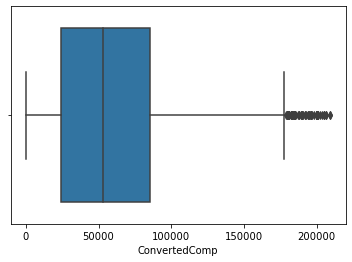

In [172]:
ax1 = sns.boxplot(x = "ConvertedComp", data = df2)

In [173]:
df2['ConvertedComp'].median()

52704.0

In [175]:
df2['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [59]:
# your code goes here
df1.corr()['Age']

Respondent                      0.004041
CompTotal                       0.006970
ConvertedComp                   0.105386
WorkWeekHrs                     0.036518
CodeRevHrs                     -0.020469
Age                             1.000000
NormalizedAnnualCompensation   -0.005222
Name: Age, dtype: float64

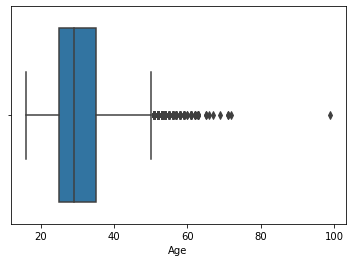

In [85]:
ax1 = sns.boxplot(x = "Age", data = df1)

In [88]:
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
L1= Q1-1.5*IQR
U2 = Q3+1.5*IQR
print(L, U)
df1[(df1['Age']< L1)].ConvertedComp.count()

25.0 35.0
10.0
-82830.0 209698.0


0

In [22]:
df['Country'].value_counts()

United States        3127
India                 897
United Kingdom        821
Germany               708
Canada                432
                     ... 
Liechtenstein           1
Rwanda                  1
Brunei Darussalam       1
Cape Verde              1
Iraq                    1
Name: Country, Length: 135, dtype: int64

In [1]:
df.info()

NameError: name 'df' is not defined

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
